In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Custom imports
import sys
sys.path.append("../")
import src.support as src
import src.cont_support as cont_src

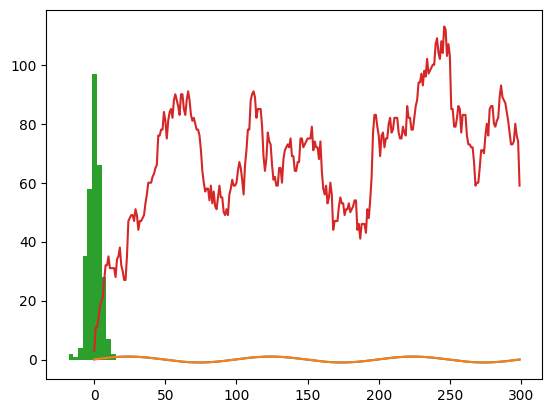

In [3]:
# Generate sample waves
n=300
sr=10
z, x, y1 = cont_src.generate_example_waves(n)
#x = [0,1,2,-0.5,0.5]
plt.plot(x)


# %%
p, p_cum = cont_src.generate_sample_perturbations(6, n, truncate=False, sr=sr)
#y, iterations = cont_src.apply_perturbations(x, p, sr)
#y= y + np.random.normal(0, 0.3, n) + 1.5*y**2 #- 0.2*y + 0.01*y**3 +
#y = src.standardise(y[~np.isnan(y)])

#%%
#plt.plot(y)
plt.plot(x)
#plt.show()


# %%
plt.hist(p)
#plt.show()
plt.plot(p_cum)

In [4]:

x_i = np.repeat(np.nan, n*sr)
pos = np.arange(0, n)*sr
np.put(x_i, pos , x)


In [7]:
print(x_i[:50])

[0.06279052        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.12533323        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.18738131        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.24868989        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.30901699        nan
        nan        nan        nan        nan        nan        nan
        nan        nan]


In [349]:
# Define a forward fill function
def ff(x):
    if np.isnan(x[0]):
        raise("Error: first value is NaN")
    else:
        for i in np.arange(1, len(x)):
            if np.isnan(x[i]):
                x[i] = x[i-1]
    return x

In [12]:
# Take the wave and multiply it by its 1.T to get a square sparse matrix decomposition
def matrix_decomp(x, n, sr):
    ones = np.repeat(1, n*sr)
    # Create 1.T
    ones = ones[np.newaxis,:]
    x = x[:, np.newaxis]
    X = np.dot(x, ones)
    I = np.identity(n*sr)
    I[I == 0] = np.nan
    X = X*I
    return X

X = matrix_decomp(x_i, n, sr)

print(X[:2, :100])


[[0.06279052        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan   

In [13]:
def shift(x: np.array, k=1):
    ''' shift the arrays'''
    if k > 0:
        y = np.concatenate([np.repeat(np.nan, k), x])
        y = y[:len(x)]
    elif k < 0:
        k = np.abs(k)
        y = np.concatenate([x, np.repeat(np.nan, k)])
        y = y[k:]
    else:
        y = x
    return y





In [14]:
def X_shift(X, sr, p):
    # First enlarge the array to include the largest positive time shift
    if np.max(p) > 0:
        X_out = np.pad(X,[(0,0),(0,np.max(p))], mode='constant', constant_values=np.nan)
    # Shift the values

    for i in np.arange(1, len(p)):
        x_r = X_out[i*sr,:]
        x_shift = shift(x_r, p[i])
        X_out[i*sr,:] = x_shift

    return X_out
    
X_s = X_shift(X.copy(), sr, p_cum)

In [15]:

x_s = np.nanmax(X_s, axis=0)
# Forward fill the nan values
#x_s = ff(x_s)
print(x_s)

[0.06279052        nan        nan ...        nan        nan        nan]


/var/folders/cp/2vygt6wd1zq2dl9rjnzq0zxc0000gn/T/ipykernel_3853/1885854690.py:1: RuntimeWarning: All-NaN slice encountered
  x_s = np.nanmax(X_s, axis=0)


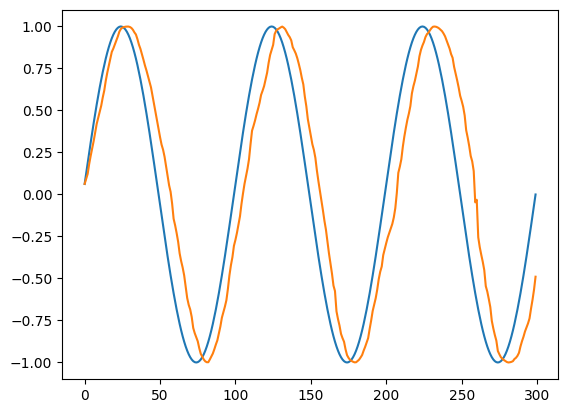

In [16]:


def ffl_interpolation(x, size):
    ''' Fill forward linear interpolation function using numpy methods'''
    nan_idx = np.isnan(x)
    y = np.arange(len(x))
    x[nan_idx] = np.interp(y[nan_idx], y[~nan_idx], x[~nan_idx])
    return x[:size]

x_out = ffl_interpolation(x_s, n*sr)
# Downsample


plt.plot(x)
plt.plot(x_out[np.arange(0,n)*sr])
#plt.plot(x_out)

